In [8]:
pip install pandas openpyxl matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(r"D:\Oasis InfoByte\unemployment\Unemployment in India.csv")
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [11]:
df = pd.read_csv(r"D:\Oasis InfoByte\unemployment\Unemployment_Rate_upto_11_2020.csv")
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   

In [12]:
df.head()      # first 5 rows
df.tail()      # last 5 rows
df.info()      # column names & data types
df.describe()  # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [13]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [14]:
df.dropna(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2516\3523223406.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


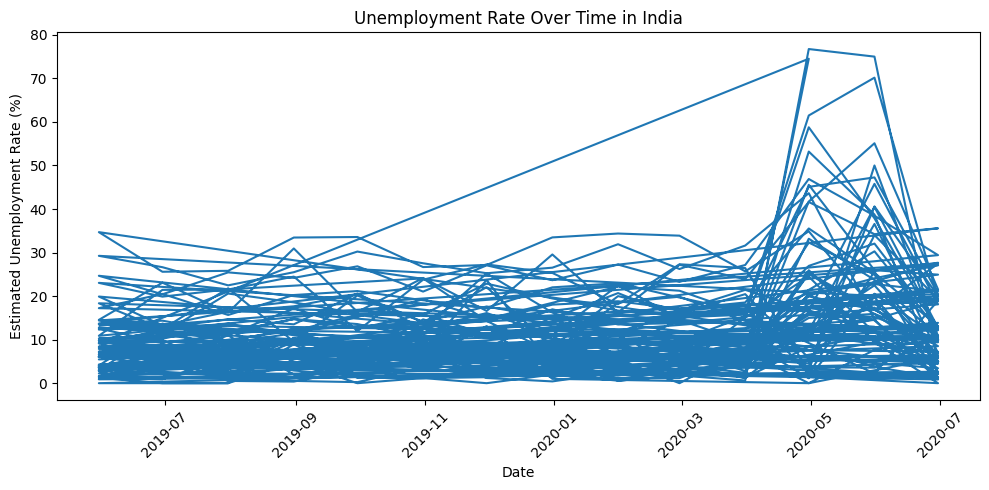

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Oasis InfoByte\unemployment\Unemployment in India.csv")

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time in India")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



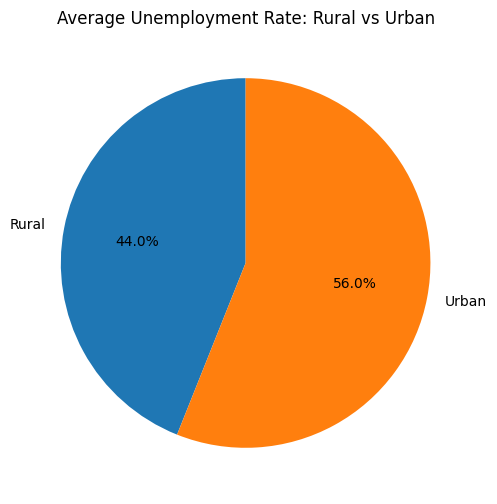

In [16]:
area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(6,6))
plt.pie(area_avg,
        labels=area_avg.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Average Unemployment Rate: Rural vs Urban")
plt.show()


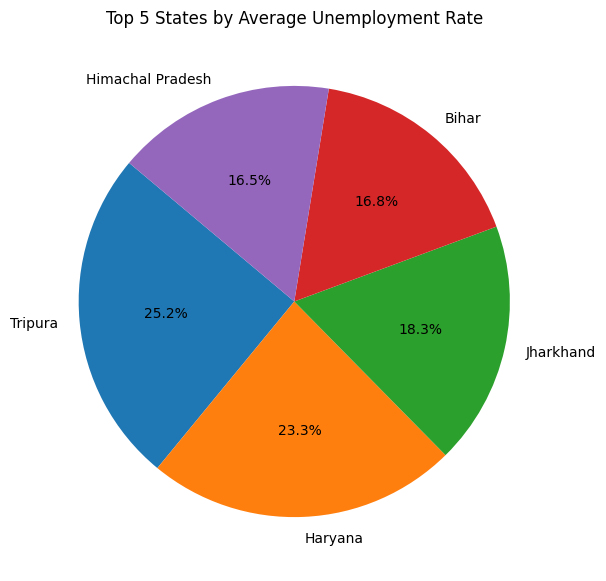

In [17]:
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
top5_states = state_avg.sort_values(ascending=False).head(5)

plt.figure(figsize=(7,7))
plt.pie(top5_states,
        labels=top5_states.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title("Top 5 States by Average Unemployment Rate")
plt.show()


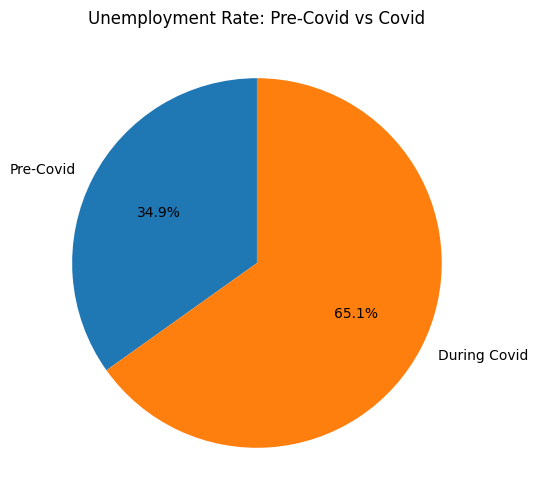

In [18]:
pre_covid = df[df['Date'] < '2020-03']['Estimated Unemployment Rate (%)'].mean()
covid = df[df['Date'] >= '2020-03']['Estimated Unemployment Rate (%)'].mean()

values = [pre_covid, covid]
labels = ['Pre-Covid', 'During Covid']

plt.figure(figsize=(6,6))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Unemployment Rate: Pre-Covid vs Covid")
plt.show()
